In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Shan Sajeer/Documents/Saiket Systems Data science Internship/Customer Churn Analysis and Prediction Project/Data/Telco_Customer_Churn_Dataset  (3).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def tenure_segment(x):
    if x <= 12:
        return "short-term"
    elif x <= 36:
        return "mid-term"
    else:
        return "long-term"
df['TenureGroup']=df['tenure'].apply(tenure_segment)
df['TenureGroup'].value_counts()

TenureGroup
long-term     3001
short-term    2186
mid-term      1856
Name: count, dtype: int64

In [4]:
df['ChargeGroup'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])
df['ChargeGroup'].value_counts()


ChargeGroup
Low       2351
High      2347
Medium    2345
Name: count, dtype: int64

In [5]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [6]:
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

tenure_churn = df.groupby('TenureGroup')['Churn_numeric'].mean() * 100
tenure_churn


TenureGroup
long-term     11.929357
mid-term      25.538793
short-term    47.438243
Name: Churn_numeric, dtype: float64

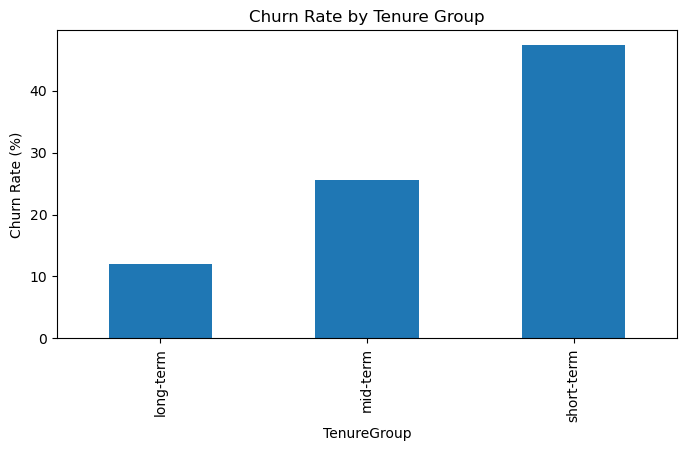

In [7]:
tenure_churn.plot(kind='bar', figsize=(8,4))
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()


In [8]:
charge_churn = df.groupby('ChargeGroup')['Churn_numeric'].mean() * 100
charge_churn

C:\Users\Shan Sajeer\AppData\Local\Temp\ipykernel_24592\1819652149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charge_churn = df.groupby('ChargeGroup')['Churn_numeric'].mean() * 100


ChargeGroup
Low       15.865589
Medium    29.680171
High      34.086067
Name: Churn_numeric, dtype: float64

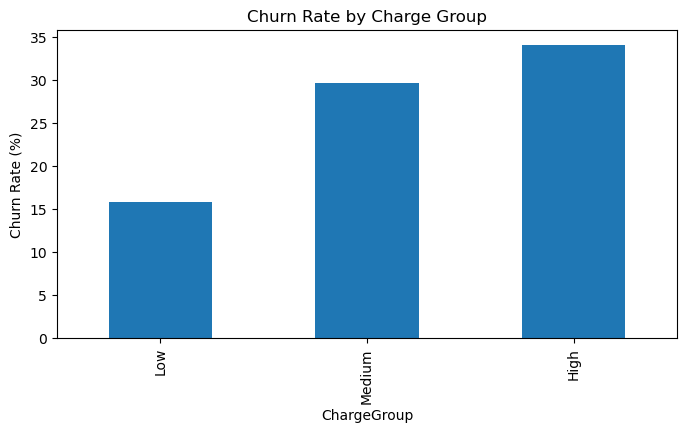

In [9]:
charge_churn.plot(kind='bar', figsize=(8,4))
plt.title("Churn Rate by Charge Group")
plt.ylabel("Churn Rate (%)")
plt.show()

In [10]:
contract_churn = df.groupby('Contract')['Churn_numeric'].mean() * 100
contract_churn


Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn_numeric, dtype: float64

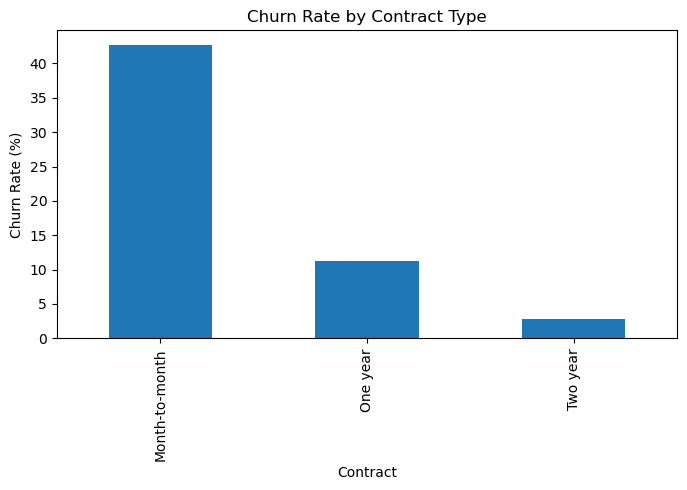

In [11]:
contract_churn.plot(kind='bar', figsize=(8,4))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()


In [12]:
high_value_risk = df[
    (df['ChargeGroup'] == 'High') &
    (df['Churn'] == 'Yes')
]

high_value_risk.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargeGroup,Churn_numeric
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,short-term,High,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,mid-term,High,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,long-term,High,1
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,long-term,High,1
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes,mid-term,High,1


In [13]:
high_value_risk.to_csv("high_value_customers_churning.csv", index=False)
